***¿UNA PELÍCULA TENDRÁ UN BOX OFFICE AL MENOS DEL DOBLE DE SU PRESUPUESTO?***

En este proyecto se buscará desarrollar un modelo supervisado de clasificación binaria para predecir si una película logrará alcanzar un box office que sea al menos el doble de su presupuesto de producción. Este tipo de predicción es importante en la industria cinematográfica, donde la rentabilidad de una película es un factor determinante en la toma de decisiones de producción, marketing y distribución.

**INSIGHTS OBTENIDOS**

Anteriormente realizamos el análisis de las columnas y datos con los que contamos en ese dataset para poder obtener información relevante respecto a las mismas y entender mejor con lo que estamos trabajando.
Desde este link se puede acceder a la primera entrega del trabajo por si se quieren observar los gráficos, preguntas e hipótesis analizadas.
https://colab.research.google.com/drive/1Q386D1kKdJO46c5kikaDUCqG83vyCd2s#scrollTo=zyYEWpIpqVtM


Resumiendo algunos puntos de lo que se obtuvo del análisis previo:
- Que un director haya dirigido varias películas no significa que si o si va a tener buenos resultados financieros.

- Existe una tendencia general de que las películas con mayor presupuesto generan mayores ingresos en taquilla.

- El año de estreno y el género no tienen una gran influencia en el box office.

- El director influye más en el éxito de una película que los actores.



**CARGA DEL ARCHIVO**


In [2]:
from google.colab import files
uploaded = files.upload()

Saving DS_peliculas.csv to DS_peliculas.csv


In [3]:
import pandas as pd
df = pd.read_csv(next(iter(uploaded)), sep=',', encoding='latin1')

In [5]:
print(df.columns)

Index(['Película', 'Director', 'Duración', 'Actor 1', 'Actor 2', 'Actor 3',
       'Género', 'Presupuesto', 'Box Office', 'Actors Box Office %',
       'Director Box Office %', 'Ganancias',
       'Nominaciones Oscar y Globos de Oro', 'Premios Oscar y Globos de Oro',
       'Año de estreno', 'Puntaje IMDB'],
      dtype='object')


**CREACIÓN DE NUEVA COLUMNA**

Se crea una nueva columna que devolverá True o False dependiendo si la película logró obtener un box office que sea al menos el doble de su presupuesto.

In [6]:
df['Dobla Presupuesto'] = df['Box Office'] >= 2 * df['Presupuesto']

In [7]:
print(df.columns)

Index(['Película', 'Director', 'Duración', 'Actor 1', 'Actor 2', 'Actor 3',
       'Género', 'Presupuesto', 'Box Office', 'Actors Box Office %',
       'Director Box Office %', 'Ganancias',
       'Nominaciones Oscar y Globos de Oro', 'Premios Oscar y Globos de Oro',
       'Año de estreno', 'Puntaje IMDB', 'Dobla Presupuesto'],
      dtype='object')


**ANÁLISIS DE TIPOS DE DATOS**

Vamos a analizar todas las columnas que no sean de dato numérico y decidir como trabajar con las mismas.
Primero se buscarán cuáles son la columnas a tratar:

In [8]:
df_non_numeric = df.select_dtypes(exclude=[float, int])
df_non_numeric.head()

,Película,Director,Actor 1,Actor 2,Actor 3,Género,Dobla Presupuesto
0,13 Hours,Michael Bay,Toby Stephens,James Badge Dale,David Costabile,Action,False
1,16 Blocks,Richard Donner,Bruce Willis,David Zayas,Sasha Roiz,Action,False
2,17 Again,Burr Steers,Matthew Perry,Hunter Parrish,Thomas Lennon,Comedy,True
3,1982,Tommy Oliver,Bokeem Woodbine,Ruby Dee,Quinton Aaron,Drama,True
4,2 Fast 2 Furious,John Singleton,Paul Walker,Cole Hauser,Mo Gallini,Action,True


Hay columnas que podemos eliminar debido a que aparecen en el dataset representados de otra manera, que es en forma de porcentaje del promedio de la cantidad de veces que los directores y actores lograron obtener un box office por lo menos igual al doble del presupuesto utilizado. De esta manera, podemos eliminar las columnas Director, Actor 1, Actor 2 y Actor 3.
Además, se conoce que el nombre de la película no es un factor influyente en si una película va a lograr un buen box office, por lo que eliminaremos esta columna (que además es díficil de representar numéricamente debido a que son todos nombres distintos).

In [9]:
df = df.drop(columns=['Actor 1'])
df = df.drop(columns=['Actor 2'])
df = df.drop(columns=['Actor 3'])
df = df.drop(columns=['Director'])
df = df.drop(columns=['Película'])


In [10]:
print(df.columns)

Index(['Duración', 'Género', 'Presupuesto', 'Box Office',
       'Actors Box Office %', 'Director Box Office %', 'Ganancias',
       'Nominaciones Oscar y Globos de Oro', 'Premios Oscar y Globos de Oro',
       'Año de estreno', 'Puntaje IMDB', 'Dobla Presupuesto'],
      dtype='object')


In [11]:
df_non_numeric = df.select_dtypes(exclude=[float, int])
df_non_numeric.head()

,Género,Dobla Presupuesto
0,Action,False
1,Action,False
2,Comedy,True
3,Drama,True
4,Action,True


**ONE-HOT ENCODING**

Todavía nos queda tratar con Género, que es una columna que cuenta con varias categorías de géneros para la película.
Para poder seguir trabajando con la reducción de la dimensionalidad del dataset, primero debemos pasar a variables númericas esta columna.
Usaremos One-Hot Encoding:



In [12]:
df_encoded = pd.get_dummies(df, columns=['Género'])


In [13]:
print(df_encoded.columns)

Index(['Duración', 'Presupuesto', 'Box Office', 'Actors Box Office %',
       'Director Box Office %', 'Ganancias',
       'Nominaciones Oscar y Globos de Oro', 'Premios Oscar y Globos de Oro',
       'Año de estreno', 'Puntaje IMDB', 'Dobla Presupuesto', 'Género_Action',
       'Género_Adventure', 'Género_Animation', 'Género_Biography',
       'Género_Comedy', 'Género_Crime', 'Género_Documentary', 'Género_Drama',
       'Género_Horror', 'Género_Mystery', 'Género_Romance', 'Género_Sci-Fi',
       'Género_Thriller', 'Género_Western'],
      dtype='object')


**HEAT MAP**

Ahora vamos a analizar un mapa de calor para ver como se relacionan las columnas entre ellas, esta es una buena forma de observar si es posible eliminar una columna debido a la fuerte relación que puede tener con otra. Esta es una técnica que puede ser útil para reducir la dimensionalidad del dataset.

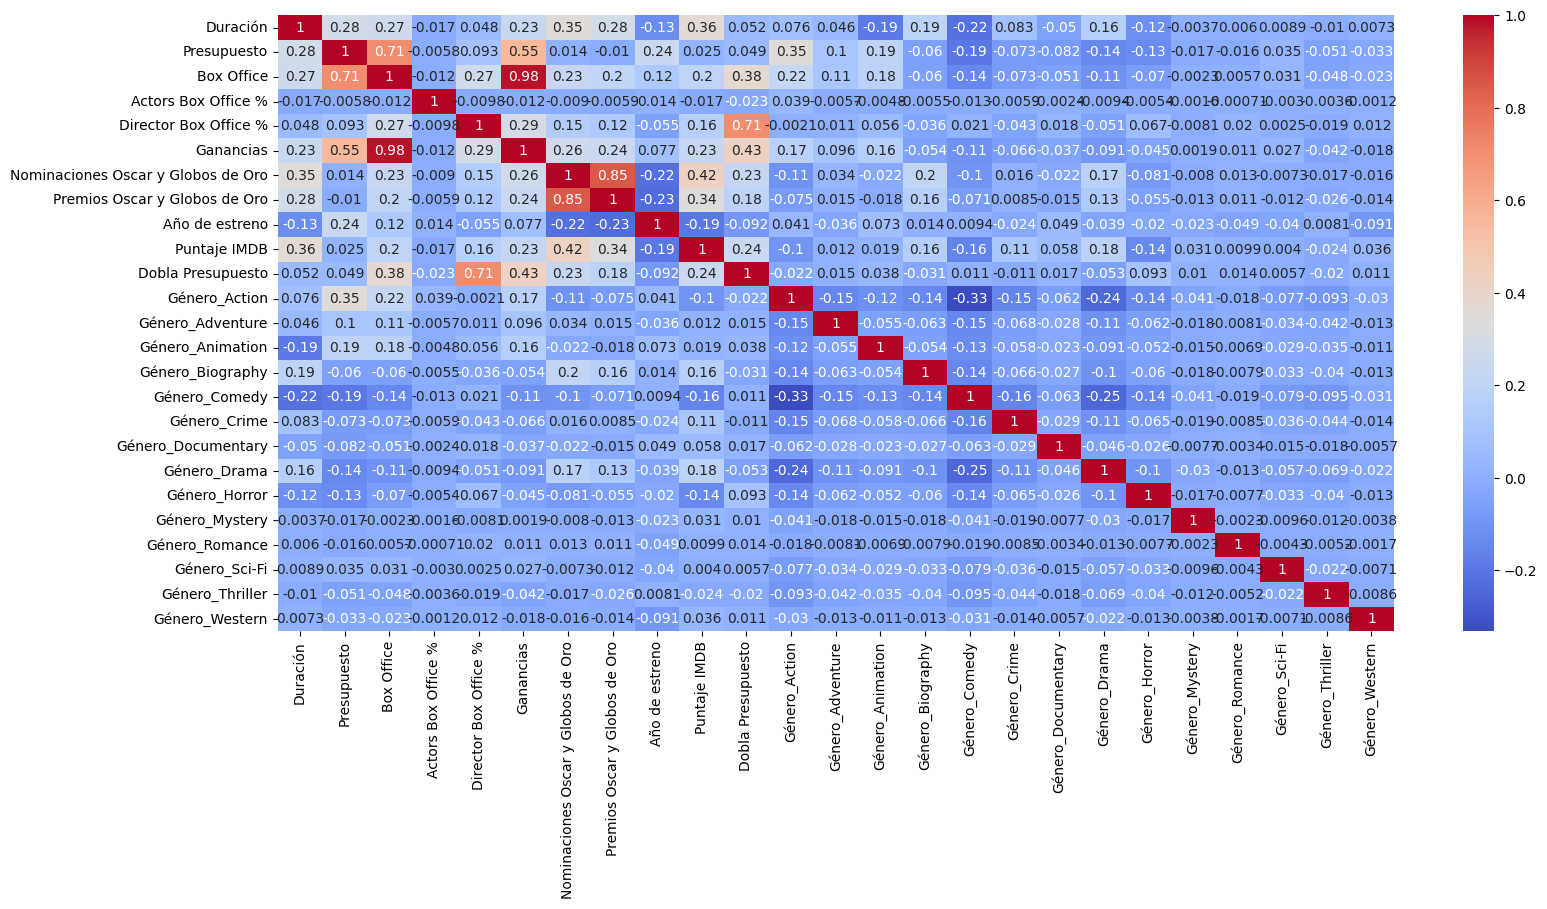

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar el tamaño del gráfico
plt.figure(figsize=(18, 8))

corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

Se observa que la columna Ganancias se relaciona fuertemente a Box Office, y también a Presupuesto. Se procederá a eliminar la columna debido a que ya contamos con la información necesaria, y no se analizan las Ganancias en sí, sino que se realiza un cálculo sobre si el box office duplica el presupueto, dato que se puede ver en la columna Dobla Presupuesto.




In [15]:
df_encoded = df_encoded.drop(columns=['Ganancias'])

También se puede ver una fuerte relación entre Nominaciones Oscar y Globos de Oro junto a Premios Oscar y Globos de Oro. Se procederá a eliminar la columba de Premios Oscar y Globos de Oro debido a que la de nominaciones tiene mayor relación con otras columnas.

In [16]:
df_encoded = df_encoded.drop(columns=['Premios Oscar y Globos de Oro'])

**CORRELACIÓN DE PEARSON**

También podemos usar la correlación de Pearson para seleccionar las características más relacionadas con la variable objetivo.
Nosotros queremos saber si una película va a alcanzar un box office de al menos el doble de su presupuesto, y este dato nos lo da la columna que creamos en base a los valores de presupuestos y box office: Dobla Presupuesto. Por lo cual, esa es una nuestra variable objetivo.
Se realizará la correlación teniendo de la siguiente manera:


In [17]:
correlation_matrix = df_encoded.corr()


In [18]:
correlation_with_target = correlation_matrix['Dobla Presupuesto'].sort_values(ascending=False)

print(correlation_with_target)


Dobla Presupuesto                     1.000000
Director Box Office %                 0.708262
Box Office                            0.377863
Puntaje IMDB                          0.235913
Nominaciones Oscar y Globos de Oro    0.226030
Género_Horror                         0.093084
Duración                              0.051770
Presupuesto                           0.048918
Género_Animation                      0.037966
Género_Documentary                    0.017484
Género_Adventure                      0.015190
Género_Romance                        0.014119
Género_Western                        0.011434
Género_Comedy                         0.010683
Género_Mystery                        0.010251
Género_Sci-Fi                         0.005732
Género_Crime                         -0.010971
Género_Thriller                      -0.020296
Género_Action                        -0.022047
Actors Box Office %                  -0.023498
Género_Biography                     -0.031238
Género_Drama 

De esta forma podemos ver más claramente cuáles son las columnas que más se relacionan con nuestra variable objetivo.
No eliminaré todas las columnas que tengan pocan relación debido a que anteriormente ya eliminamos algunas, y me gustaría poder conservar las relacionadas a los géneros.
Procedo a dropear la columna de año de estreno.

In [19]:
df_encoded = df_encoded.drop(columns=['Año de estreno'])

Ya eliminamos varias columnas categóricas y numéricas que no influían significativamente en nuestro objetivo.
Y también hicimos one hot encoding para la columna de Género.

Por último, vamosa dropear la columna de Box Office, que va de la mano de nuestra variable objetivo Dobla Presupuesto.
De esta manera el modelo no podrá saber directamente si una película es un éxito en taquilla, sino que se trabajarán con las demás features.

In [20]:
df_encoded = df_encoded.drop(columns=['Box Office'])

In [27]:
print(df_encoded.columns)

Index(['Duración', 'Presupuesto', 'Actors Box Office %',
       'Director Box Office %', 'Nominaciones Oscar y Globos de Oro',
       'Puntaje IMDB', 'Dobla Presupuesto', 'Género_Action',
       'Género_Adventure', 'Género_Animation', 'Género_Biography',
       'Género_Comedy', 'Género_Crime', 'Género_Documentary', 'Género_Drama',
       'Género_Horror', 'Género_Mystery', 'Género_Romance', 'Género_Sci-Fi',
       'Género_Thriller', 'Género_Western'],
      dtype='object')


Ahora se continuará con la elección del algoritmo de clasificación para entrenar y testear los datos.

**ELECCIÓN DE ALGORITMO**

**¿KNN O ÁRBOL DE DECISIÓN?**

Probaremos los modelos de clasificación de KNN (k vecinos más cercanos) y el árbol de decisión para finalmente elegir uno de los dos. Usaremos métricas para ayudarnos con la toma final.

**IMPORTACIÓN DE LIBRERÍAS**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Separaramos características (X) y variable objetivo (y)

X = df_encoded.drop('Dobla Presupuesto', axis=1)
y = df_encoded['Dobla Presupuesto']

**ENTRENAMIENTO DE MODELOS**

**DIVISIÓN DEL DATASET EN ENTRENAMIENTO Y TESTEO**

Se decidió entrenar el 75% y testear el 25%.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**KNN**

El algoritmo se basa en la idea de que es probable que puntos de datos similares tengan resultados similares. Para realizar una predicción de un nuevo punto de datos, el algoritmo encuentra los k puntos de datos más cercanos en el conjunto de entrenamiento, en función de alguna medida de distancia, y asigna la salida en función del voto mayoritario o el promedio de las salidas de estos k vecinos. El valor de k es un hiperparámetro que se puede ajustar para optimizar el rendimiento del algoritmo.

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento KNN
knn = KNeighborsClassifier(n_neighbors=5)  # k = 5
knn.fit(X_train_scaled, y_train)

# Predicciones KNN
y_pred_knn = knn.predict(X_test_scaled)

**ÁRBOL DE DECISIÓN**

se basa en la idea de dividir los datos en subconjuntos más pequeños y homogéneos en función de algunos criterios, como la entropía o el índice de Gini. Cada división está representada por un nodo en el árbol, y cada nodo hoja corresponde a una salida final o a una etiqueta de clase. Para realizar una predicción de un nuevo punto de datos, el algoritmo sigue la ruta desde el nodo raíz hasta el nodo hoja, en función de los valores de las entidades.

In [25]:
# Entrenamiento árbol de decisión
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Predicciones árbol de decisión
y_pred_tree = tree.predict(X_test)

**PRECISIÓN EN EL CONJUNTO DE ENTRENAMIENTO**

In [26]:
# Predicciones en el conjunto de entrenamiento
y_train_pred_knn = knn.predict(X_train)

# Evaluación del modelo KNN en el conjunto de entrenamiento
print("\nEvaluación del Modelo KNN (Conjunto de Entrenamiento)")
print("Precisión:", accuracy_score(y_train, y_train_pred_knn))
print("Reporte de Clasificación:\n", classification_report(y_train, y_train_pred_knn))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(



Evaluación del Modelo KNN (Conjunto de Entrenamiento)
Precisión: 0.5315860215053764
Reporte de Clasificación:
               precision    recall  f1-score   support

       False       1.00      0.00      0.00      1395
        True       0.53      1.00      0.69      1581

    accuracy                           0.53      2976
   macro avg       0.77      0.50      0.35      2976
weighted avg       0.75      0.53      0.37      2976



Como se obtuvo una precisión baja, trabajaremos en mejorar el entrenamiento creando un pipeline para escalar las características.

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Crear un pipeline con escalado y KNN
pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))

pipeline.fit(X_train, y_train)

# Hacer predicciones
y_train_pred_knn_new = pipeline.predict(X_train)

print("Evaluación del Modelo KNN con Escalado")
print("Precisión en Entrenamiento:", accuracy_score(y_train, y_train_pred_knn_new))
print("Reporte de Clasificación en Entrenamiento:\n", classification_report(y_train, y_train_pred_knn_new))


Evaluación del Modelo KNN con Escalado
Precisión en Entrenamiento: 0.863239247311828
Reporte de Clasificación en Entrenamiento:
               precision    recall  f1-score   support

       False       0.86      0.85      0.85      1395
        True       0.87      0.88      0.87      1581

    accuracy                           0.86      2976
   macro avg       0.86      0.86      0.86      2976
weighted avg       0.86      0.86      0.86      2976



In [30]:
y_pred_knn_new = pipeline.predict(X_test)

In [31]:
# Predicciones en el conjunto de entrenamiento
y_train_pred_tree = tree.predict(X_train)

# Evaluación del modelo Árbol de Decisión en el conjunto de entrenamiento
print("\nEvaluación del Modelo Árbol de Decisión (Conjunto de Entrenamiento)")
print("Precisión:", accuracy_score(y_train, y_train_pred_tree))
print("Reporte de Clasificación:\n", classification_report(y_train, y_train_pred_tree))


Evaluación del Modelo Árbol de Decisión (Conjunto de Entrenamiento)
Precisión: 0.9996639784946236
Reporte de Clasificación:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      1395
        True       1.00      1.00      1.00      1581

    accuracy                           1.00      2976
   macro avg       1.00      1.00      1.00      2976
weighted avg       1.00      1.00      1.00      2976



Acá se nos presenta un caso de overfitting, ya que la precisión es bastante perfecta, esto significa que el modelo estudio de memoria los datos de entrenamiento. Procederemos a realizar configuraciones en nuestro árbol:

**Limitar la profundidad del árbol**

Reducir la profundidad máxima del árbol es una forma eficaz de prevenir que el modelo memorice los datos de entrenamiento.

In [32]:
tree_2 = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [33]:
y_train_pred_tree_2 = tree_2.predict(X_train)

print("Evaluación del Modelo Árbol de Decisión (Conjunto de Prueba)")
print("Precisión:", accuracy_score(y_train, y_train_pred_tree_2))
print("Reporte de Clasificación:\n", classification_report(y_train, y_train_pred_tree_2))

Evaluación del Modelo Árbol de Decisión (Conjunto de Prueba)
Precisión: 0.9028897849462365
Reporte de Clasificación:
               precision    recall  f1-score   support

       False       0.91      0.88      0.90      1395
        True       0.90      0.92      0.91      1581

    accuracy                           0.90      2976
   macro avg       0.90      0.90      0.90      2976
weighted avg       0.90      0.90      0.90      2976



De esta manera logramos evitar el overfitting obtenido inicialmente.

KNN Precisión en Entrenamiento: 0.863239247311828

Árbol de Decisión Precisión en Entrenamiento: 0.9028897849462365

En el entrenamiento podemos observar un mejor valor en el modelo de KNN, aunque con una muy leve diferencia. Ahora evaluemos los modelos con los datos de testeo.


In [34]:
y_pred_tree_2 = tree_2.predict(X_test)

**EVALUACIÓN DE MODELOS CON DATOS DE TEST**

Accuracy: Qué tan bien predice el modelo en general.

Precision: Qué tan preciso es el modelo al clasificar las clases positivas.

Recall: Qué tan bien el modelo detecta las clases positivas.

F1 Score: El balance entre precisión y recall.

**KNN**

In [36]:
print("Evaluación del Modelo KNN")
print("Precisión:", accuracy_score(y_test, y_pred_knn_new))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_knn_new))


Evaluación del Modelo KNN
Precisión: 0.7724068479355488
Reporte de Clasificación:
               precision    recall  f1-score   support

       False       0.77      0.76      0.76       478
        True       0.78      0.79      0.78       515

    accuracy                           0.77       993
   macro avg       0.77      0.77      0.77       993
weighted avg       0.77      0.77      0.77       993



**ÁRBOL DE DECISIÓN**

In [37]:
print("\nEvaluación del Modelo Árbol de Decisión")
print("Precisión:", accuracy_score(y_test, y_pred_tree_2))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_tree_2))



Evaluación del Modelo Árbol de Decisión
Precisión: 0.8700906344410876
Reporte de Clasificación:
               precision    recall  f1-score   support

       False       0.86      0.88      0.87       478
        True       0.88      0.86      0.87       515

    accuracy                           0.87       993
   macro avg       0.87      0.87      0.87       993
weighted avg       0.87      0.87      0.87       993



Luego de entrenar y probar ambos modelos, podemos ver que la presición del árbol de decisión es mayor, quedanto los resultados de la siguiente manera:

Precisión KNN: 0.7724068479355488

Precisión Árbol de Decisión: 0.8700906344410876

**Más pruebas**

¿Que pasaría si cambiamos la cantidad de neighbors en KNN?
Veamos como cambia la precisión:

**K = 3**

In [38]:
# Entrenamiento KNN
knn_2 = KNeighborsClassifier(n_neighbors=3)  # k = 3
knn_2.fit(X_train_scaled, y_train)

# Predicciones KNN
y_pred_knn_2 = knn_2.predict(X_test_scaled)

In [39]:
print("Evaluación del Modelo KNN")
print("Precisión:", accuracy_score(y_test, y_pred_knn_2))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_knn_2))

Evaluación del Modelo KNN
Precisión: 0.7593152064451159
Reporte de Clasificación:
               precision    recall  f1-score   support

       False       0.75      0.75      0.75       478
        True       0.77      0.77      0.77       515

    accuracy                           0.76       993
   macro avg       0.76      0.76      0.76       993
weighted avg       0.76      0.76      0.76       993



**K = 8**

In [40]:
# Entrenamiento KNN
knn_3 = KNeighborsClassifier(n_neighbors=8)  # k = 8
knn_3.fit(X_train_scaled, y_train)

# Predicciones KNN
y_pred_knn_3 = knn_3.predict(X_test_scaled)

In [41]:
print("Evaluación del Modelo KNN")
print("Precisión:", accuracy_score(y_test, y_pred_knn_3))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_knn_3))

Evaluación del Modelo KNN
Precisión: 0.7623363544813696
Reporte de Clasificación:
               precision    recall  f1-score   support

       False       0.74      0.79      0.76       478
        True       0.79      0.74      0.76       515

    accuracy                           0.76       993
   macro avg       0.76      0.76      0.76       993
weighted avg       0.76      0.76      0.76       993



Se puede ver que la variación cambia dependiendo de la cantidad de vecinos que se usan. De las pruebas que hicimos, k=5 es el de mayor precisión

**ELECCIÓN DE MODELO**

Luego de evaluar ambos modelos, utilizando métricas y ajustando sus características, se procede a elegir como modelo final al Árbol de Decisión, debido a que devolvió mejores resultados durante el testeo.
El árbol logró también una mejor precisión durante el entrenamiento, y con una diferencia menor entre la precisión del entrenamiento vs la de test. A diferencia, el modelo KNN mostro números más bajos, y tuvo mayor diferencia entre la precisión de entrenar y testear.

**SE ELIGE ÁRBOL DE DECISIÓN COMO MODELO FINAL**

Como último aporte, se realizó una matriz de confusión con el modelo final elegido. De esta manera, se pueden observar los falsos positivos y negativos más claramente:

In [51]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

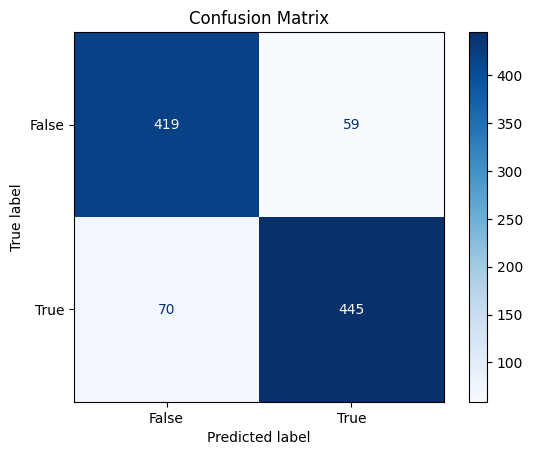

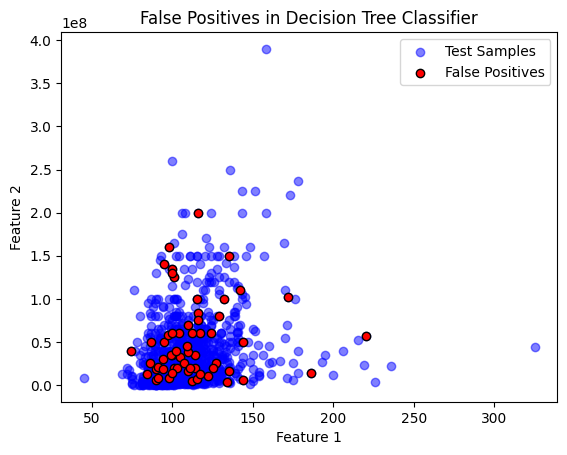

In [52]:
# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred_tree_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_2.classes_)

# Mostrar la matriz de confusión
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Identificar los Falsos Positivos
# (false positives son aquellos que el modelo predijo como 1 cuando en realidad son 0)
false_positives = []
X_test_np = X_test.to_numpy()  # Convertir X_test a numpy array para indexado
y_test_np = y_test.to_numpy()  # Convertir y_test a numpy array para indexado

for i in range(len(y_test)):
    if y_pred_tree_2[i] != y_test_np[i]:  # Si la predicción es incorrecta
        if y_pred_tree_2[i] == 1:  # Si el modelo predijo que dobla el presupuesto pero no lo hizo
            false_positives.append(X_test_np[i])

# Convertir los falsos positivos en un numpy array
false_positives = np.array(false_positives)

# Visualizar los falsos positivos
# Nota: Esto funcionará si tienes dos características importantes en X_test que se puedan graficar
plt.scatter(X_test_np[:, 0], X_test_np[:, 1], c='blue', label='Test Samples', alpha=0.5)
if len(false_positives) > 0:  # Solo graficar si existen falsos positivos
    plt.scatter(false_positives[:, 0], false_positives[:, 1], c='red', label='False Positives', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('False Positives in Decision Tree Classifier')
plt.legend()
plt.show()

En conclusión, luego de aplicar varias herramientas para reducir la dimensionalidad y de aplicar one-hot encoding de las columnas necesarias, procedimos a evaluar dos modelos distintos de Machine Learning: KNN y Árbol de Decisión.

Por medio de pruebas y distintas configuraciones logramos obtener buenas métricas para ambos modelos, pero la precisión del árbol de decisión en los datos de testeo fueron mejor, con un valor de aproximadamente 0.87

Siempre es importante ir probando distintos modelos, así como las configuraciones de los mismos, esto es prueba y error hasta lograr encontrar un resultado más óptimo y que nos sirva para trabajar.


Con los resultados obtenidos a lo largo de este proyecto, podemos afirmar que el rendimiento anterior de los directores influye en el éxito taquillero que tendrá una película. El puntaje IMDB y las nominaciones/premios que pueden llegar a tener también pueden influír en sus ganancias, ya que aquí juega el boca en boca, lo cual hace que más personas vayan conociendo una película cuando esta tiene buenas reseñas.

También pudimos observar detalladamente como varios factores que parecían más importantes para la recaudación de un film, son menos importantes, tales como el género. Si nos ponemos a analizar más profundamente esto, podemos ver en los datos que trabajamos que una película de acción generalmente tiene un mayor presupuesto que una película, por ejemplo, de romance, por lo que si generalmente este género tiene mejor rendimiento, no signfica que logrará duplicar su presupuesto, debido a que el número es más alto.
Conclusiones como estas podemos sacar muchísimas, las películas son un mundo muy interesante para analizar y desarrollar modelos basados en ellos.

A medida que realizaba el proyecto, pude darme cuenta que hay otros factores que no se están tomando en cuenta pero también serían importantes a la hora de medir el éxito, como por ejemplo el marketing, época de año de estreno (vacaciones, festividades, etc.). Mi objetivo futuro será poder obtener más información respecto a estos campos y poder sumarlos como features de mi modelo.


En el trabajo final se logró aplicar varios conceptos vistos en clases, así como profundizar en estos mismos, con un mayor entendimiento.